# Hidden Markov model

### A Hidden Markov Model (HMM) is a statistical Markov model in which the system being modeled is assumed to be a Markov process with unobserved (hidden) states. It consists of:

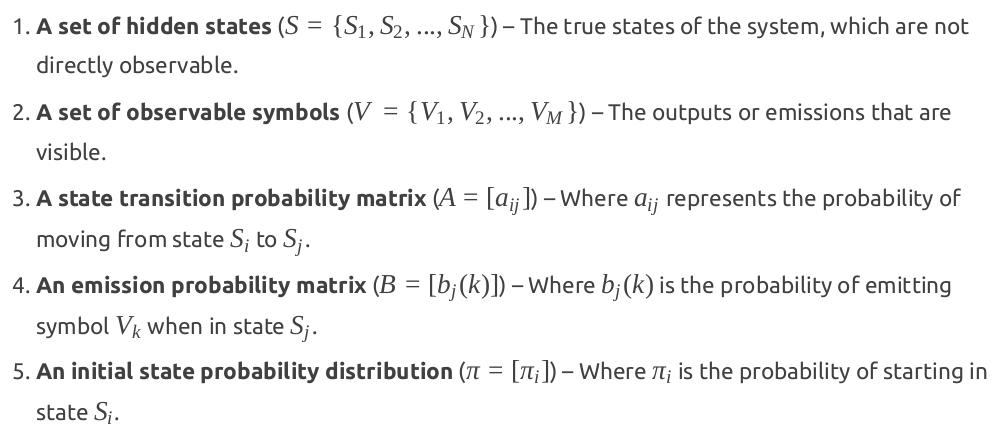

In [1]:
from IPython.display import Image, display

# Display the image with adjustable width (in pixels)
display(Image(filename="/home/andre/HMM.png", width=800))

### HMMs are widely used in speech recognition, bioinformatics (e.g., gene prediction), natural language processing, and other applications involving sequential data with hidden patterns.

### Key Problems in HMMs

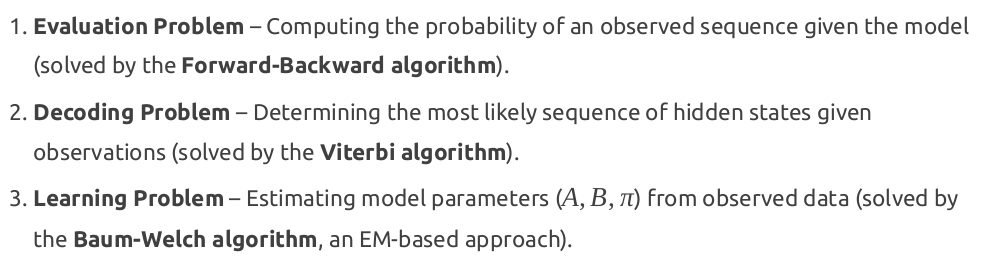

In [2]:
# Display the image with adjustable width (in pixels)
display(Image(filename="/home/andre/HMM1.png", width=800))

### HMMs assume the Markov property, meaning the future state depends only on the current state, not on previous states.

### "An HMM can be thought of as a system where you see the effects (observations) but cannot directly see the causes (hidden states), and the behavior of the system follows a Markov chain."

In [3]:
# Installing the modules
#!pip install numpy pandas yfinance hmmlearn matplotlib

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Importing modules
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [6]:
#!pip install --upgrade yfinance

In [27]:
# 1. Download data from Yahoo Finance (e.g.: PETR4.SA)
ticker = 'PETR4.SA'
df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
df = df[['Close']]
# Returns a DataFrame (pandas.DataFrame), containing only the 'Close' column, but still with a table structure (2D).
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


### Due to Yahoo's instability at the moment, we will replace it with another dataset. 

In [8]:
# Open the file containing the dataset.Ticker: LREN3
df = pd.read_csv("/home/andre/dataset.csv")

In [9]:
df

,date,trend,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov,open,high,low,close,adjclose,volume,ticker
0,2011-01-01,Uptrend,0.83,10.943548,"132,66","106,1","163,71","1,67411428571429",1525.61,66575,9.264964,9.492898,7.756332,7.936712,6.187788,149128856,LREN3.SA
1,2011-02-01,Uptrend,0.80,11.250000,"136,18","111,4","166,17","1,66719",1533.05,67383,8.033461,8.736943,7.756332,8.363064,6.520191,120569757,LREN3.SA
2,2011-03-01,Uptrend,0.79,11.717742,"144,93","105,3","162,43","1,6583",1629.59,68587,8.364704,9.059987,8.140049,8.672990,6.761821,106565665,LREN3.SA
3,2011-04-01,Uptrend,0.77,11.800000,"139,89","108,5","163,01","1,58564736842105",1672.59,66133,8.672990,9.660159,8.625435,9.519135,7.440604,87893355,LREN3.SA
4,2011-05-01,Uptrend,0.47,12.000000,"143,23","106,4","155,6","1,61269090909091",1636.41,64620,9.512576,9.819222,8.896005,9.814302,7.843419,108838470,LREN3.SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2021-08-01,Downtrend,0.87,5.120968,"142,05","100,9","143,86","5,25112272727273",5007.44,118781,38.172726,38.927273,33.890907,34.599998,33.343025,198600380,LREN3.SA
128,2021-09-01,Downtrend,1.16,5.516667,"138,96","94,1","148,22","5,27909047619048",4709.56,110979,34.363636,34.745453,30.709089,31.290909,30.154148,189096600,LREN3.SA
129,2021-10-01,Downtrend,1.25,6.443548,"138,46","94,2","142,89","5,539375",4251.43,103501,31.345453,33.299999,27.636362,29.299999,28.334637,259968500,LREN3.SA
130,2021-11-01,Downtrend,0.95,7.750000,"140,22",88,"142,22","5,55626",3932.70,101915,29.318180,34.759998,27.799999,28.450001,27.512648,224430940,LREN3.SA


In [10]:
# Rename the column name 
df.rename(columns={'close': 'Close'}, inplace=True)

In [11]:
# 2. Calculate logarithmic returns
df['LogRet'] = np.log(df['Close'] / df['Close'].shift(1))
# df['Close'].shift(1) shifts the 'Close' column down by one row (i.e., gets the previous closing price).
# Log returns are commonly used in finance when working with time series data.

df.dropna(inplace=True)
# This removes any row from the DataFrame df that contains a NaN value.
# NaN (Not a Number). In mathematics, the result of 0/0⁠ is typically not defined as a number and may therefore be represented by NaN in computing systems.

In [12]:
# 3. Train HMM model with 2 states (bullish e bearish)
X = df['LogRet'].values.reshape(-1, 1)
# .values: Converts the pandas Series to a NumPy array.
# .reshape(-1, 1): Reshapes the array from a 1D shape like (N,) to a 2D shape like (N, 1), because the HMM expects a 2D input (samples × features).

In [13]:
model = GaussianHMM(n_components=2, covariance_type='full', n_iter=1000, random_state=42)
# This line creates an instance of a Hidden Markov Model (HMM) with the following parameters:

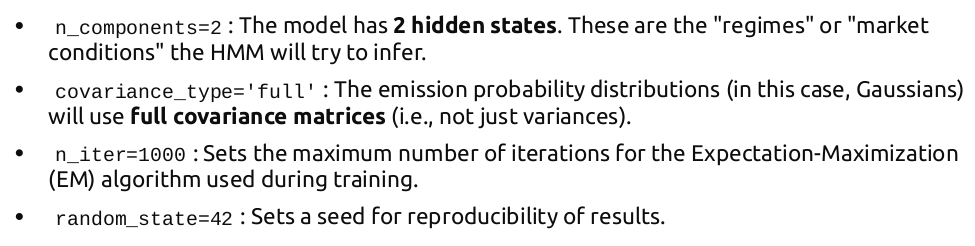

In [14]:
# Display the image with adjustable width (in pixels)
display(Image(filename="/home/andre/HMM2.png", width=800))

In [20]:
#!conda install -c conda-forge numpy scikit-learn threadpoolctl --force-reinstall -y

In [16]:
# This trains the HMM on your data (X) using the EM algorithm.
model.fit(X)
# It learns: 
# (1) Transition probabilities between the hidden states.
# (2) Parameters of the Gaussian distributions (mean and covariance) for each hidden state.
# (3) Initial state distribution.

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000,
            random_state=42)

In [17]:
# 4. Infer hidden states
hidden_states = model.predict(X)
# This line uses the trained Hidden Markov Model (model) to predict the most likely sequence of hidden states for the input data X.
# It applies the Viterbi algorithm internally, which finds the most probable path of hidden states given the observed sequence (in this case, the log returns).
# Result: hidden_states is an array of integers (like [0, 1, 0, 0, 1, ...]), where each number represents a hidden state inferred by the model for a specific time step.
df['State'] = hidden_states

In [24]:
# Seek for State = 1
df.loc[df['State'] != 0]   # Only one state 1

,date,trend,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov,open,high,low,Close,adjclose,volume,ticker,LogRet,State
110,2020-03-01,Downtrend,0.07,4.040323,"136,04","88,1","135,08","4,88321818181818",3372.66,73020,52.580723,54.525215,26.111784,33.29451,31.329506,263851698,LREN3.SA,-0.462601,1


### You can now analyze how the market behaves under each state — for example, look at the average return, volatility, or price trend in each regime.

### you're essentially labeling each time period in your data with a hidden "regime" or "market condition" as identified by the HMM.

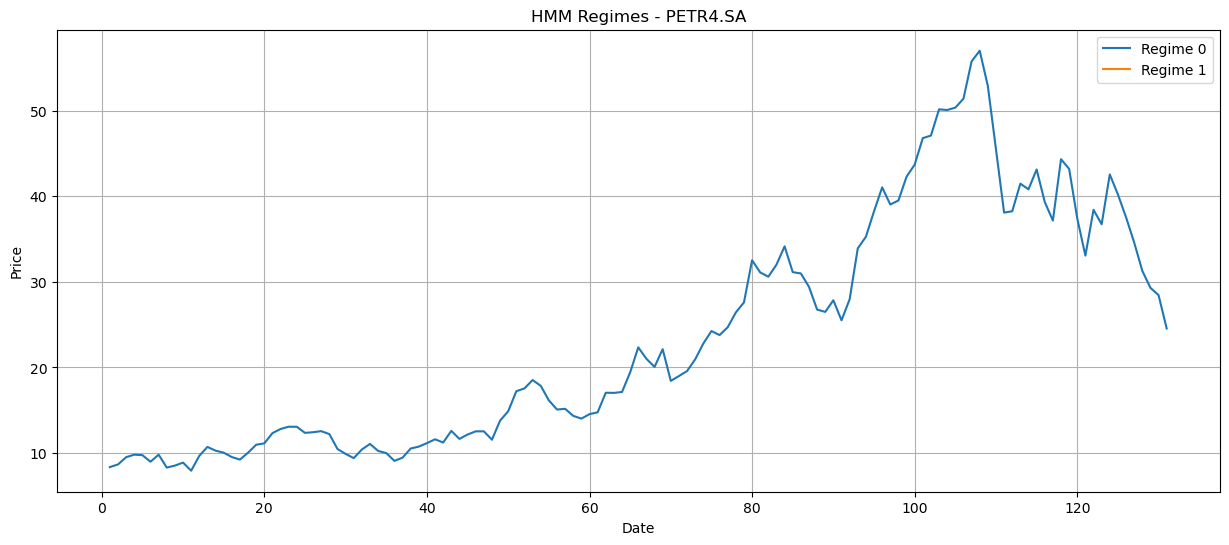

In [25]:
# 5. View market regimes
plt.figure(figsize=(15, 6))
for i in range(model.n_components):
    state = df[df['State'] == i]
    plt.plot(state.index, state['Close'], label=f'Regime {i}')
    
plt.legend()
plt.title(f'HMM Regimes - {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [26]:
# 6. Statistics for each regime
for i in range(model.n_components):
    print(f'\nRegime {i}:')
    print(f'Average return: {X[hidden_states == i].mean():.4%}')
    print(f'Standard deviation: {X[hidden_states == i].std():.4%}')


Regime 0:
Average return: 1.2245%
Standard deviation: 7.9307%

Regime 1:
Average return: -46.2601%
Standard deviation: 0.0000%


### HMM for PETR4

In [28]:
# 2. Calculate logarithmic returns
df['LogRet'] = np.log(df['Close'] / df['Close'].shift(1))
# df['Close'].shift(1) shifts the 'Close' column down by one row (i.e., gets the previous closing price).
# Log returns are commonly used in finance when working with time series data.

df.dropna(inplace=True)
# This removes any row from the DataFrame df that contains a NaN value.
# NaN (Not a Number). In mathematics, the result of 0/0⁠ is typically not defined as a number and may therefore be represented by NaN in computing systems.

In [29]:
# 3. Train HMM model with 2 states (bullish e bearish)
X = df['LogRet'].values.reshape(-1, 1)
# .values: Converts the pandas Series to a NumPy array.
# .reshape(-1, 1): Reshapes the array from a 1D shape like (N,) to a 2D shape like (N, 1), because the HMM expects a 2D input (samples × features).

In [30]:
model = GaussianHMM(n_components=2, covariance_type='full', n_iter=1000, random_state=42)
# This line creates an instance of a Hidden Markov Model (HMM) with the following parameters:

In [31]:
# This trains the HMM on your data (X) using the EM algorithm.
model.fit(X)
# It learns: 
# (1) Transition probabilities between the hidden states.
# (2) Parameters of the Gaussian distributions (mean and covariance) for each hidden state.
# (3) Initial state distribution.

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000,
            random_state=42)

In [32]:
# 4. Infer hidden states
hidden_states = model.predict(X)
# This line uses the trained Hidden Markov Model (model) to predict the most likely sequence of hidden states for the input data X.
# It applies the Viterbi algorithm internally, which finds the most probable path of hidden states given the observed sequence (in this case, the log returns).
# Result: hidden_states is an array of integers (like [0, 1, 0, 0, 1, ...]), where each number represents a hidden state inferred by the model for a specific time step.
df['State'] = hidden_states

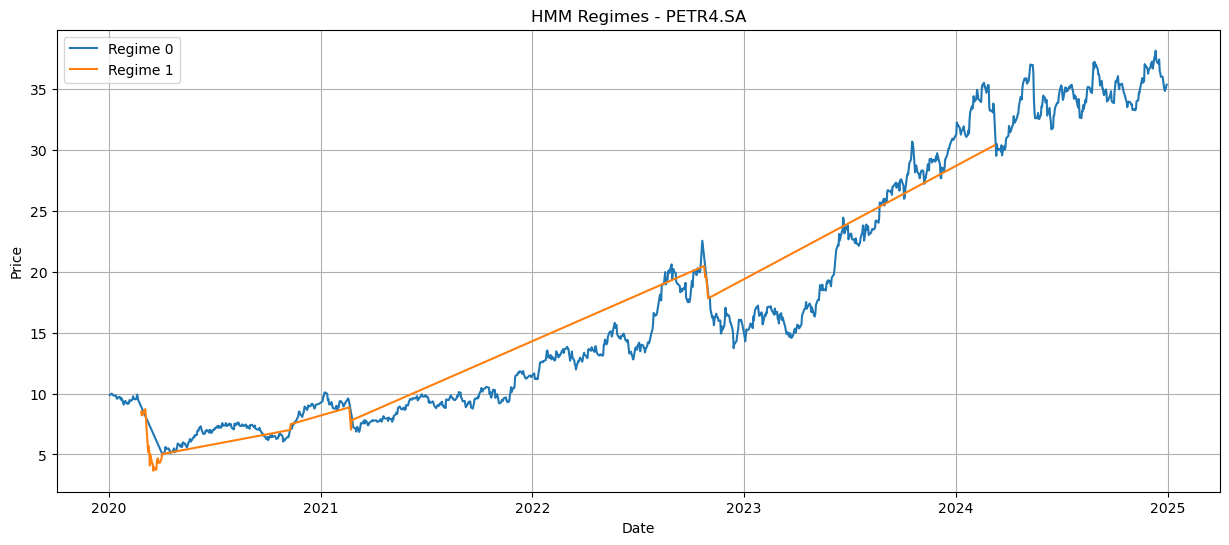

In [33]:
# 5. View market regimes
plt.figure(figsize=(15, 6))
for i in range(model.n_components):
    state = df[df['State'] == i]
    plt.plot(state.index, state['Close'], label=f'Regime {i}')
    
plt.legend()
plt.title(f'HMM Regimes - {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### The line looks segmented and more “straight” because the graph is just connecting the consecutive points where regime 1 was detected.

### It does not cover the entire period, because the HMM only identified some parts of the series as belonging to regime 1.

## The HMM model classifies each day with a single state (0 or 1).

In [34]:
# 6. Statistics for each regime
for i in range(model.n_components):
    print(f'\nRegime {i}:')
    print(f'Average return: {X[hidden_states == i].mean():.4%}')
    print(f'Standard deviation: {X[hidden_states == i].std():.4%}')


Regime 0:
Average return: 0.1885%
Standard deviation: 2.1534%

Regime 1:
Average return: -2.5692%
Standard deviation: 10.6896%


### Another way to visualize - now including the original price by CLOSE

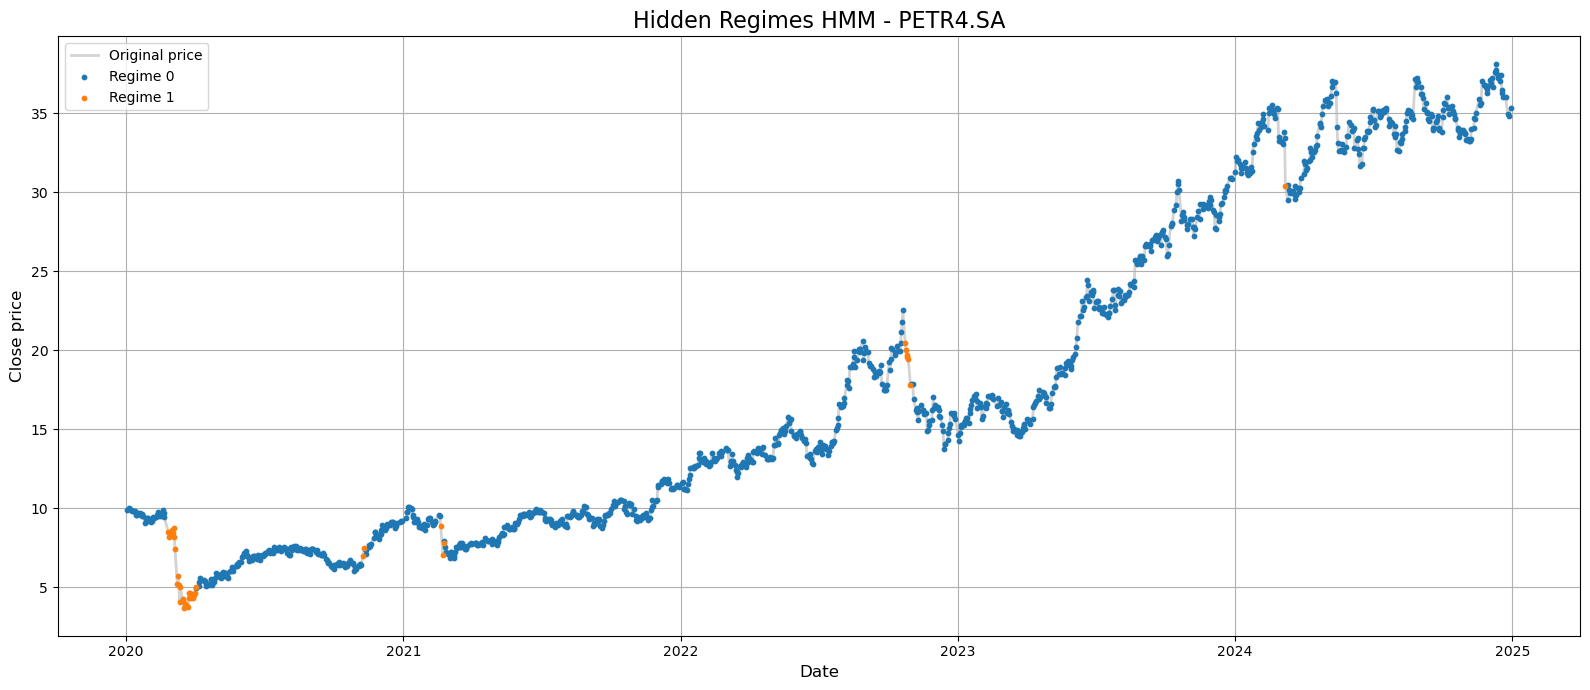

In [36]:
# Custom colors for each regime
colors = ['tab:blue', 'tab:orange']

plt.figure(figsize=(16, 7))

# 1. Plot the original closing price (baseline)
plt.plot(df.index, df['Close'], color='lightgray', label='Original price', linewidth=2, zorder=1)

# 2. For each regime, highlight the points where it occurs
for i in range(model.n_components):
    state = df[df['State'] == i]
    plt.scatter(state.index, state['Close'], 
                color=colors[i], 
                label=f'Regime {i}', 
                s=10, zorder=2)

# 3. Chart customization
plt.title(f'Hidden Regimes HMM - {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
